In [2]:
import yfinance as yf
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
start=datetime(2020,1,1)
end= datetime(2021,8,1)

In [4]:
nvda = pdr.get_data_yahoo("NVDA",start,end)
tsla = pdr.get_data_yahoo("TSLA",start,end)
nflx = pdr.get_data_yahoo("NFLX",start,end)
goog = pdr.get_data_yahoo("GOOG",start,end)

4


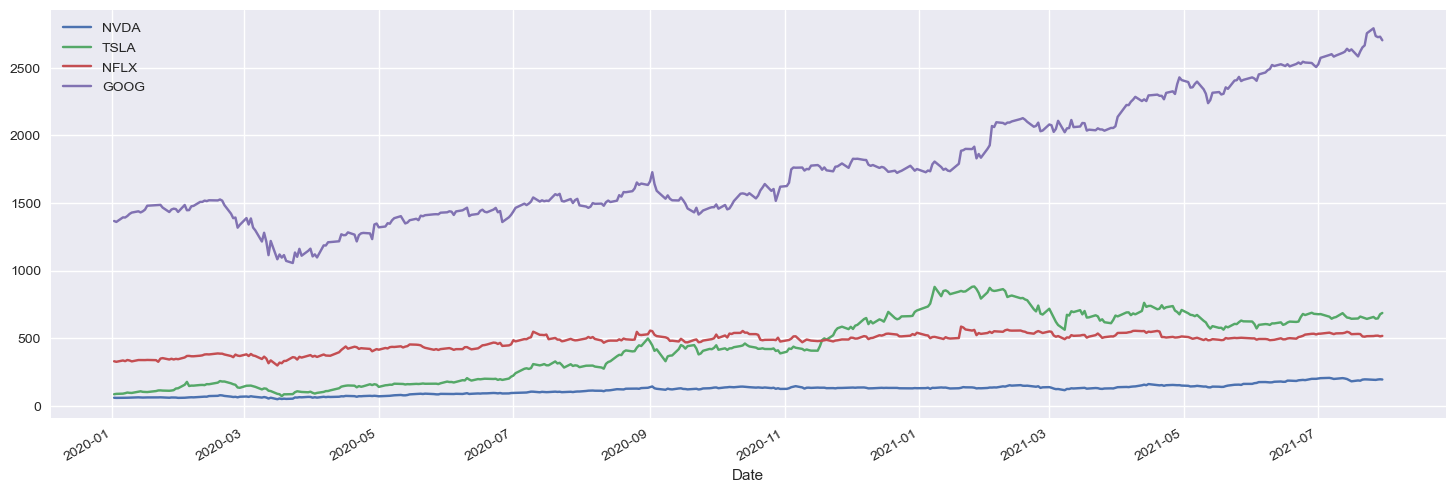

In [5]:
stocks = pd.concat([nvda['Close'],tsla['Close'],nflx['Close'],goog['Close']],axis=1)
stocks.columns = ['NVDA','TSLA','NFLX','GOOG']
asset_num=len(stocks.columns)
plt.style.use('seaborn')
print(asset_num)
stocks.plot(figsize=(18,6))
plt.show()
plt.close()

In [6]:
returns = stocks/stocks.shift(1)
logReturns = np.log(returns)
logReturns = logReturns.drop(logReturns.index[:1])
logReturns.head()

,NVDA,TSLA,NFLX,GOOG
Date,,,,
2020-01-03,-0.016135,0.029203,-0.011926,-0.004919
2020-01-06,0.004185,0.019072,0.030014,0.024358
2020-01-07,0.012034,0.038067,-0.015242,-0.000624
2020-01-08,0.001874,0.048033,0.025404,0.007849
2020-01-09,0.010923,-0.022189,-0.010668,0.010984


In [7]:
pBar = logReturns.mean()*100 
Sigma = logReturns.cov()*100 

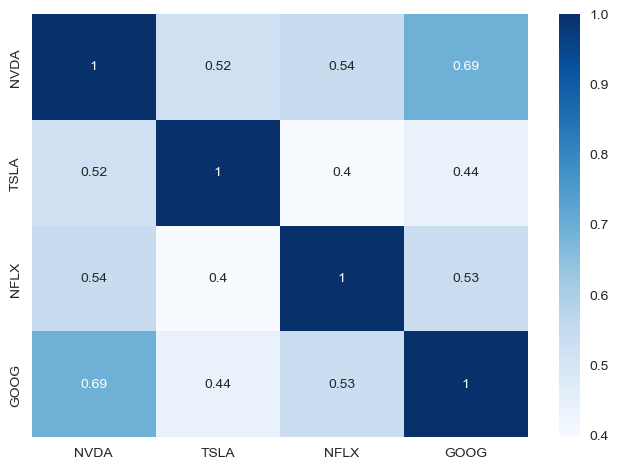

In [8]:
sns.heatmap(logReturns.corr(), annot=True, cmap="Blues")
plt.show()

In [9]:
r_result = []
cov_result = []
for i in range(asset_num):
  cov_result.append(Sigma.iloc[i:i])
  r_result.append(pBar[i])
r_result = np.array(r_result)
cov_result = np.array(cov_result)
r_result

array([0.29697199, 0.52334348, 0.11350833, 0.17178797])

In [10]:
prets = [] #returns
pvols = [] #volatilities / std / risk
for i in range (100000):
  np.random.seed(i)
  weights = np.random.random(4)
  weights /= np.sum(weights)
  prets.append(np.sum(weights * r_result))
  pvols.append(np.sqrt(np.dot(weights.T, np.dot(Sigma, weights))))

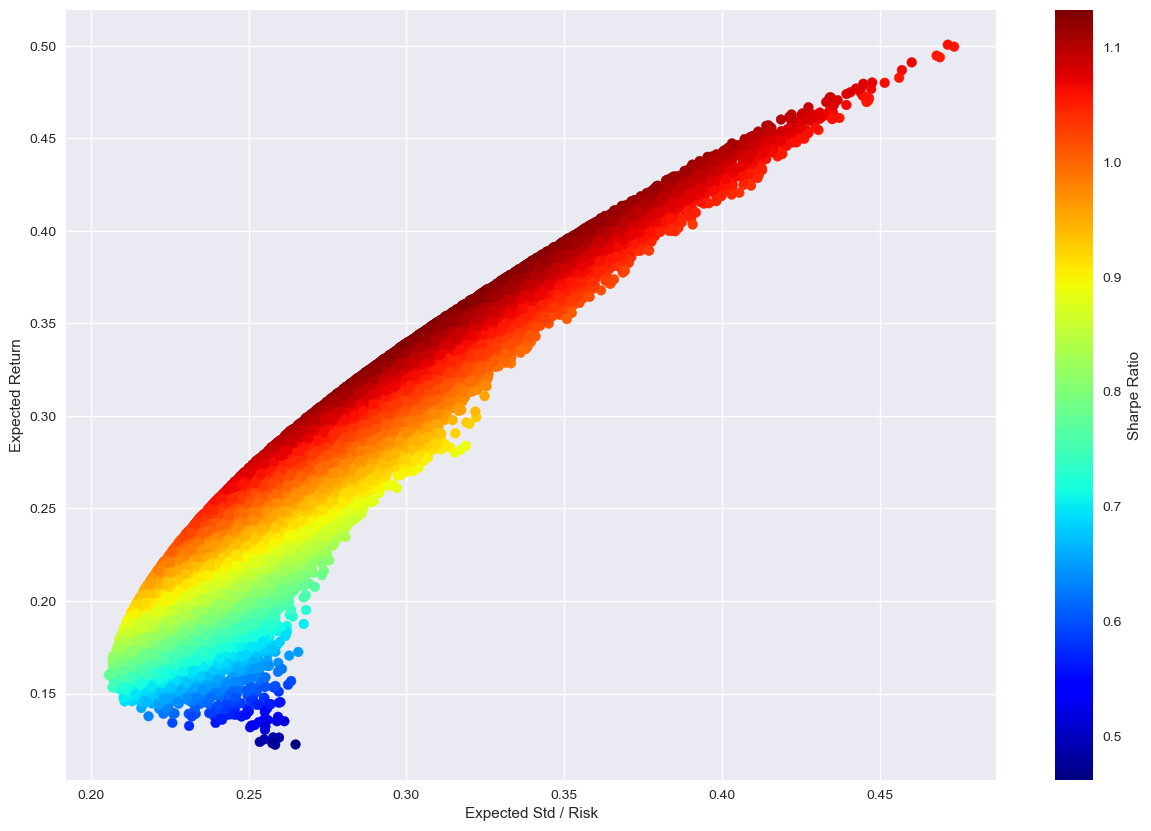

In [11]:
prets = np.array(prets)
pvols = np.array(pvols)
c = prets/pvols
plt.figure(figsize=(15,10))
plt.scatter(pvols, prets, c=c, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('Expected Std / Risk')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()
plt.close()

In [12]:
def MarkowitzSingleEquationSolver(rMin, Sigma, pBar):
  N = len(Sigma)
  o = np.ones(N)
  SigmaInv = np.linalg.inv(Sigma)
  a = np.dot(pBar.T, np.dot(SigmaInv, pBar))
  b = np.dot(pBar.T, np.dot(SigmaInv, o))
  c = np.dot(o.T, np.dot(SigmaInv, o))

  return (1/(a*c - b**2)) * np.dot(SigmaInv, ((c*rMin - b)*pBar +(a-b*rMin)*o))

In [13]:
rMin = 0.02
w_SingleEquation = MarkowitzSingleEquationSolver(rMin, Sigma, pBar)
w_SingleEquation

array([-0.32823638, -0.22008278,  0.57184144,  0.97647771])

In [14]:
def riskFunction(w):
  return np.dot(w.T, np.dot(Sigma,w))
risk = riskFunction(w_SingleEquation)
risk


0.054863713520715146

In [15]:
np.sum(pBar*w_SingleEquation)

0.019999999999999962

In [16]:
np.sum(w_SingleEquation)

0.9999999999999999